# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Dyas Amortia Radhwa Nashirah]
- **Email:** [dyasamorita@gmail.com]
- **ID Dicoding:** [dyas_amorita_qJgY]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Apa hubungan antara musim dan jumlah penyewa sepeda?
- Pertanyaan 2: Apakah ada perbedaan jumlah penyewa sepeda pada tiap jamnya? apakah ada jam tertentu dimana terdapat aktivitas penyewaan sepeda yang lebih banyak?

## Import Semua Packages/Library yang Digunakan

In [177]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

## Data Wrangling

### Gathering Data

In [178]:
day_df = pd.read_csv("https://raw.githubusercontent.com/dMorran/Bangkit_CSV/main/Bike_sharing_dataset/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [179]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/dMorran/Bangkit_CSV/main/Bike_sharing_dataset/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [180]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [181]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [182]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [183]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [184]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [185]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [186]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [187]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

In [188]:
day_df.duplicated().sum()

0

In [189]:
hour_df.duplicated().sum()

0

In [190]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Terdapat kesalahan data berdasarkan informasi yang diberikan. Yaitu tipe dari kolom 'dteday' seharusnya 'datetime' bukan object.

In [191]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

In [192]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [193]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

Sedangkan pada data lain tidak terdapat kekosongan data dan duplikasi data.

In [216]:
hour_df.to_csv("main_data.csv", index=False)

## Exploratory Data Analysis (EDA)

### Explore Day & Hour

In [194]:
day_df.sample(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
634,635,2012-09-26,4,1,9,0,3,1,1,0.635000,0.596613,0.630833,0.244400,787,6946,7733
73,74,2011-03-15,1,0,3,0,2,1,2,0.317391,0.318178,0.655652,0.184309,289,1767,2056
425,426,2012-03-01,1,1,3,0,4,1,1,0.485833,0.475371,0.615417,0.226987,325,4665,4990
95,96,2011-04-06,2,0,4,0,3,1,1,0.390833,0.387608,0.470833,0.263063,413,2395,2808
328,329,2011-11-25,4,0,11,0,5,1,1,0.375000,0.380671,0.643750,0.098896,1095,1697,2792
543,544,2012-06-27,3,1,6,0,3,1,1,0.697500,0.640792,0.360000,0.271775,1077,6258,7335
121,122,2011-05-02,2,0,5,0,1,1,2,0.549167,0.532833,0.730000,0.183454,847,3554,4401
694,695,2012-11-25,4,1,11,0,0,0,1,0.245833,0.257583,0.468333,0.150500,309,2115,2424
305,306,2011-11-02,4,0,11,0,3,1,1,0.377500,0.390133,0.718750,0.082092,370,3816,4186
430,431,2012-03-06,1,1,3,0,2,1,1,0.258333,0.255042,0.456667,0.200875,221,3735,3956


In [196]:
day_df.describe(include="all")

<ipython-input-196-51e59b52191b>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  day_df.describe(include="all")


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000


Dataset diatas menampilkan data yang diambil tiap hari dengan total 731 hari. Data seperti humidity, kecepatan angin, jumlah penyewa casual dan penyewa yang sudah teregistrasi. Berdasarkan data tersebut kita dapat membuat analisis mengenai hubungan antara kondisi lingkungan terhadap jumlah kegiatan penyewaan sepeda.

In [210]:
day_df.groupby(by="yr").instant.nunique().sort_values(ascending=False)

yr
1    366
0    365
Name: instant, dtype: int64

In [211]:
day_df.groupby(by="mnth").instant.nunique().sort_values(ascending=False)

mnth
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     57
Name: instant, dtype: int64

Melihat Jumlah pengguna sepeda berdasarkan musim

In [197]:
day_df.groupby(by="season").instant.nunique().sort_values(ascending=False)

season
3    188
2    184
1    181
4    178
Name: instant, dtype: int64

In [198]:
day_df.groupby(by="mnth").agg({
    "atemp": ["max", "min", "mean", "std"],
    "temp": ["max", "min", "mean", "std"],
})

atemp                                    temp                      \
           max       min      mean       std       max       min      mean   
mnth                                                                         
1     0.415383  0.079070  0.239796  0.082071  0.425000  0.059130  0.236444   
2     0.511983  0.101658  0.299731  0.082139  0.521667  0.127500  0.299226   
3     0.570067  0.200133  0.381954  0.100767  0.601667  0.198333  0.390539   
4     0.614925  0.283454  0.457081  0.079400  0.664167  0.300000  0.469999   
5     0.725383  0.404650  0.565662  0.059507  0.775000  0.414167  0.594798   
6     0.786613  0.525892  0.638246  0.055332  0.834167  0.540833  0.684097   
7     0.840896  0.549912  0.704094  0.055027  0.861667  0.595833  0.755470   
8     0.751267  0.242400  0.651475  0.064561  0.793333  0.635833  0.708582   
9     0.708983  0.461475  0.579299  0.052444  0.753333  0.469167  0.616485   
10    0.607975  0.227913  0.471973  0.074780  0.657500  0.254167  0.485012   
11    0.524612  0.248742  0.367359  0.063580  0.530000  0.245833  0.369220   
12    0.469054  0.220333  0.326160  0.067330  0.475833  0.215833  0.324031   

                
           std  
mnth            
1     0.083266  
2     0.084314  
3     0.104674  
4     0.087255  
5     0.072999  
6     0.066094  
7     0.051950  
8     0.039913  
9     0.061916  
10    0.084009  
11    0.064527  
12    0.067852

Penjelasan data berdasarkan readme:

1: springer,

2: summer,

3: fall,

4: winter


**Akan tetapi dilihat dari data tabel dan juga temperatur terdapat beberapa keanehan**

In [199]:
day_df.groupby(by="mnth").agg({
    "season": "unique",
    "temp": ["max", "min", "mean", "std"],
})

season      temp                              
      unique       max       min      mean       std
mnth                                                
1        [1]  0.425000  0.059130  0.236444  0.083266
2        [1]  0.521667  0.127500  0.299226  0.084314
3     [1, 2]  0.601667  0.198333  0.390539  0.104674
4        [2]  0.664167  0.300000  0.469999  0.087255
5        [2]  0.775000  0.414167  0.594798  0.072999
6     [2, 3]  0.834167  0.540833  0.684097  0.066094
7        [3]  0.861667  0.595833  0.755470  0.051950
8        [3]  0.793333  0.635833  0.708582  0.039913
9     [3, 4]  0.753333  0.469167  0.616485  0.061916
10       [4]  0.657500  0.254167  0.485012  0.084009
11       [4]  0.530000  0.245833  0.369220  0.064527
12    [4, 1]  0.475833  0.215833  0.324031  0.067852

Dari data diatas jika berdasarkan readme yang disajikan season 1 adalah spring sementar season 2 adalah summer. pada dataset dapat dilihat ketidaksesuaian pada data karena pada bulan dengan temperatur tinggi yaitu antara bulan 6 - 9 ditulis sebagai fall, padahal seharusnya jika benar data tersebut diambil berdasarkan data dari Washington DC bulan tersebut masih summer, bukan fall. Selain itu suhu pada summer seharusnya lebih tinggi daripada fall, sedangkan pada tabel season 2 lebih dingin daripada season 3. Oleh karena itu saya ingin merubah indeks menjadi seperti ini:

1:winter,

2:spring,

3:summer,

4:fall

In [200]:
day_df.groupby(by="season").instant.nunique().sort_values(ascending=False)

season
3    188
2    184
1    181
4    178
Name: instant, dtype: int64

Selanjutnya dengan label yang baru dan berdasarkan data diatas dapat terlihat bahwa data paling banyak ada pada Summer (3), dan yang paling rendah adalah saat fall (4). Akan tetapi jumlah data tidak bisa menentukan jumlah penyewa karena jumlah yang dihitung adalah jumlah hari. Oleh karena itu kita perlu mengetahui jumlah penyewa per-musim yang dapat kita ambil dari kolom count.

In [201]:
day_df.groupby(by="season").agg({
    "cnt": "sum"
}).sort_values(by="cnt", ascending=False)

,cnt
season,
3,1061129
2,918589
4,841613
1,471348


Dari data diatas dapat terlihat bahwa musim dengan jumpah penyewa sepeda terbanyak adalah Summer (3) dan yang paling sedikit adalah Winter (1).

Kemudian untuk tambahan berikut ini adalah persebaran persewaan berdasarkan tahun

In [212]:
day_df.groupby(by="yr").agg({
    "cnt": "sum"
}).sort_values(by="cnt", ascending=False)

,cnt
yr,
1,2049576
0,1243103


Persebaran Persewaan berdasarkan bulan:

In [214]:
day_df.groupby(by="mnth").agg({
    "cnt": "sum",
    "casual": "sum",
    "registered": "sum"
}).sort_values(by="cnt", ascending=False)

,cnt,casual,registered
mnth,,,
8,351194,72039,279155
6,346342,73906,272436
9,345991,70323,275668
7,344948,78157,266791
5,331686,75285,256401
10,322352,59760,262592
4,269094,60802,208292
11,254831,36603,218228
3,228920,44444,184476


## Hour.csv

In [202]:
hour_df.describe(include="all")

<ipython-input-202-55b8ff84265d>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  hour_df.describe(include="all")


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000


Sedikit berbeda dengan dataset day.csv, dataset hour.csv menyajikan data yang jauh lebih rinci dimana data disajikan per-jamnya dalam 1 hari. dengan data tersebut maka dapat diketahui mengenai persebaran aktivitas penyewaan sepeda berdasarkan jam, seperti jam berapa biasanya sering terjadi penyewaan sepeda.

Untuk mengetahui persebaran jumlah penyewa sepeda berdasarkan jam secara umum dapat menggunakan data berikut:

In [203]:
hour_df.groupby(by="hr").agg({
    "cnt": "sum",
}).sort_values(by="cnt", ascending=False)

,cnt
hr,
17,336860
18,309772
8,261001
16,227748
19,226789
13,184919
12,184414
15,183149
14,175652


Kemudian untuk mencari persebaraan aktivitas penyewaan berdasarkan jam pada tiap musim adalah sebagai berikut, disini diambil data sample pada musim 1 yaitu winter

In [204]:
filtered_df = hour_df.groupby('season').filter(lambda x: x['season'].iloc[0] == 1)

result_df = filtered_df.groupby(by="hr").agg({
    "cnt": "sum"
}).sort_values(by="cnt", ascending=False)

print(result_df)

      cnt
hr       
17  47780
18  43110
8   42095
16  32999
19  29837
13  28175
15  28018
12  27131
14  26605
9   26316
11  21575
20  21211
7   20655
10  17939
21  16497
22  12440
23   7994
6    7261
0    4878
1    3229
2    2175
5    1830
3    1108
4     490


## Visualization & Explanatory Analysis

### Pertanyaan 1: Apa hubungan antara musim dan jumlah penyewa sepeda?

<ipython-input-205-f8134f512e3b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


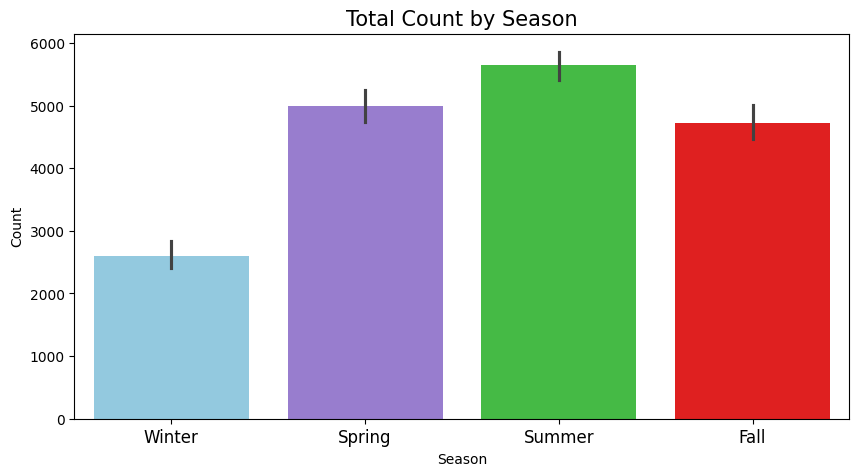

In [205]:
import seaborn as sns
day_df.groupby(by="season").agg({
    "cnt": "sum"
}).sort_values(by="cnt", ascending=False)

plt.figure(figsize=(10, 5))
colors_ = ["#87CEEB", "#9370DB", "#32CD32", "#FF0000"]
sns.barplot(
    y="cnt",
    x="season",
    data=day_df.sort_values(by="cnt", ascending=False),
    palette=colors_
)
plt.title("Total Count by Season", loc="center", fontsize=15)
plt.ylabel("Count")
plt.xlabel("Season")
plt.tick_params(axis='x', labelsize=12)
plt.xticks(ticks=range(4), labels=["Winter", "Spring", "Summer", "Fall"])

plt.show()

In [206]:
day_df.groupby(by="season").agg({
    "cnt": sum,
    "temp": ["max", "min", "mean", "std"],
})


cnt      temp                              
            sum       max       min      mean       std
season                                                 
1        471348  0.572500  0.059130  0.297748  0.102735
2        918589  0.808333  0.253043  0.544405  0.122650
3       1061129  0.861667  0.469167  0.706309  0.070848
4        841613  0.657500  0.220833  0.422906  0.107834

Kemudian untuk melihat hubungan antara Suhu, musim, dan jumlah penyewa akan lebih mudah apabila menggunakan scatterplot

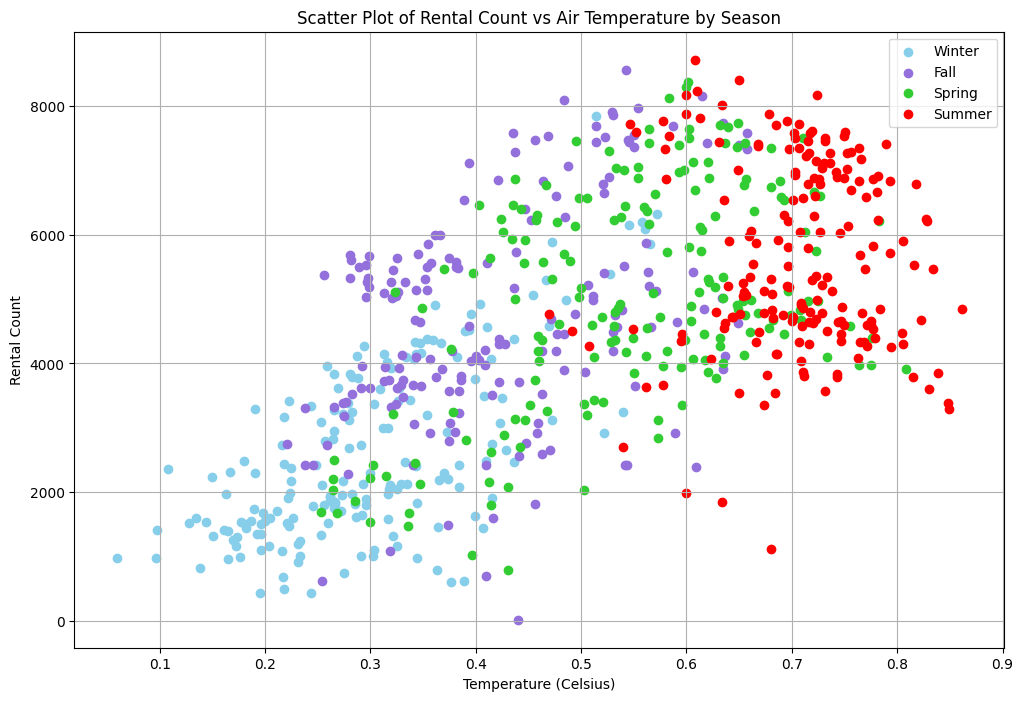

In [207]:
# Mengganti label musim dari angka menjadi kata
day_df['season'] = day_df['season'].map({1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'})

# Scatter plot untuk tiap musim dengan palet warna yang telah ditentukan
plt.figure(figsize=(12, 8))
colors_ = ["#87CEEB", "#9370DB", "#32CD32", "#FF0000"]
for season, color in zip(['Winter', 'Fall', 'Spring', 'Summer'], colors_):
    season_data = day_df[day_df["season"] == season]
    plt.scatter(season_data["temp"], season_data["cnt"], label=season, color=color)

plt.title("Scatter Plot of Rental Count vs Air Temperature by Season")
plt.xlabel("Temperature (Celsius)")
plt.ylabel("Rental Count")
plt.legend()
plt.grid(True)
plt.show()

Berdasarkan kedua visualisasi diatas dapat disimpulkan bahwa aktivitas penyewaan sepeda banyak terjadi di musim semi-panas, sedangkan pada dingin jumlah penyewa cukup sedikit. Kemudian berdasarkan Scatterplot dapat diketahui bahwa aktivitas penyewaan dipengaruhi oleh suhu dimana jumlah penyewa meningkat seiring dengan meningkatnya suhu udara apapun musimnya.



### Pertanyaan 2: Apakah ada perbedaan jumlah penyewa sepeda pada tiap jamnya? apakah ada jam tertentu dimana terdapat aktivitas penyewaan sepeda yang lebih banyak?

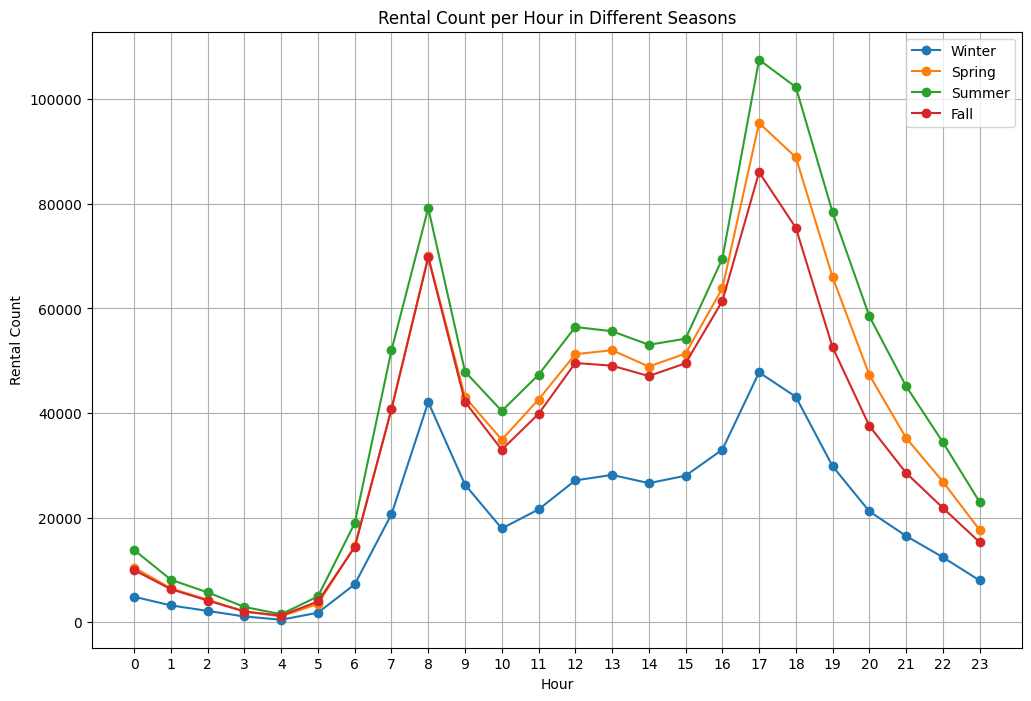

In [208]:
season_titles = {1: "Winter", 2: "Spring", 3: "Summer", 4: "Fall"}

# Plot grafik garis untuk setiap musim
plt.figure(figsize=(12, 8))
for season_index, season_title in season_titles.items():
    # Filter dataframe berdasarkan musim tertentu
    filtered_df = hour_df[hour_df['season'] == season_index]

    # Hitung total jumlah penyewa per jam
    result_df = filtered_df.groupby(by="hr").agg({
        "cnt": "sum"
    }).sort_values(by="hr")

    # Plot grafik garis
    plt.plot(result_df.index, result_df['cnt'], marker='o', linestyle='-', label=season_title)

plt.title("Rental Count per Hour in Different Seasons")
plt.xlabel("Hour")
plt.ylabel("Rental Count")
plt.xticks(result_df.index)
plt.legend()
plt.grid(True)
plt.show()

Berdasarkan grafik diatas dapat dilihat sebuah pola terkait aktivitas penyewaan sepeda dimana pada setiap musim aktivitas penyewaan sepeda meningkat pada pukul 7-8 dan 16-18, dimana jam tersebut merupakan rush hour/jam kerja. Jumlah penyewa tertingi adalah pada pada pukul 4 - 6 sore.



## Conclusion

- Conclution pertanyaan 1

  Dapat disimpulkan bahwa aktivitas penyewaan sepeda dipengaruhi oleh suhu dan musim. Penyewa akan cenderung menyewa sepeda pada suhu yang hangat, dan akan menurun pada suhu yang dingin. Kesimpulan tersebut diambil berdasarkan diagram batang yang menampilkan jumlah penyewa yang tinggi pada musim panas dan grafik Scatterplot dimana jumlah penyewa meningkat seiring dengan meningkatnya suhu udara apapun musimnya.

- Conclution pertanyaan 2
  
  Berdasarkan data yang diberikan, disimpulkan bahwa aktivitas penyewaan sepeda mengalami peningkatan yang besar pada rush hour yaitu antara pukul 6-9 pagi dan pukul 4 - 7 sore yang ditunjukkan oleh peningkatan aktivitas persewaan secara drastis pada jam itu.